In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import requests
import pandas as pd
import numpy as np

In [2]:
ticker = "AMZN"
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10

In [3]:
url = (f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?limit={years}&apikey={api_key}")
r = requests.get(url)
income_statement = r.json()

print(income_statement)

[{'date': '2022-12-31', 'symbol': 'AMZN', 'reportedCurrency': 'USD', 'cik': '0001018724', 'fillingDate': '2023-02-03', 'acceptedDate': '2023-02-02 18:27:34', 'calendarYear': '2022', 'period': 'FY', 'revenue': 513983000000, 'costOfRevenue': 446343000000, 'grossProfit': 67640000000, 'grossProfitRatio': 0.1315996833, 'researchAndDevelopmentExpenses': 73213000000, 'generalAndAdministrativeExpenses': 11891000000, 'sellingAndMarketingExpenses': 42238000000, 'sellingGeneralAndAdministrativeExpenses': 54129000000, 'otherExpenses': -16806000000, 'operatingExpenses': 55392000000, 'costAndExpenses': 501735000000, 'interestIncome': 989000000, 'interestExpense': 2367000000, 'depreciationAndAmortization': 41921000000, 'ebitda': 38352000000, 'ebitdaratio': 0.0746172539, 'operatingIncome': 12248000000, 'operatingIncomeRatio': 0.0238295819, 'totalOtherIncomeExpensesNet': -16806000000, 'incomeBeforeTax': -5936000000, 'incomeBeforeTaxRatio': -0.0115490201, 'incomeTaxExpense': -3217000000, 'netIncome': -2

In [4]:
df_income_statement = pd.DataFrame(income_statement)
print(df_income_statement)


         date symbol reportedCurrency         cik fillingDate  \
0  2022-12-31   AMZN              USD  0001018724  2023-02-03   
1  2021-12-31   AMZN              USD  0001018724  2022-02-04   
2  2020-12-31   AMZN              USD  0001018724  2021-02-03   
3  2019-12-31   AMZN              USD  0001018724  2020-01-31   
4  2018-12-31   AMZN              USD  0001018724  2019-02-01   

          acceptedDate calendarYear period       revenue  costOfRevenue  ...  \
0  2023-02-02 18:27:34         2022     FY  513983000000   446343000000  ...   
1  2022-02-03 18:46:51         2021     FY  469822000000   403507000000  ...   
2  2021-02-02 19:44:10         2020     FY  386064000000   334564000000  ...   
3  2020-01-30 20:46:13         2019     FY  280522000000   241699000000  ...   
4  2019-01-31 20:22:40         2018     FY  232887000000   202020000000  ...   

   incomeBeforeTaxRatio  incomeTaxExpense    netIncome  netIncomeRatio   eps  \
0             -0.011549       -3217000000  -2722

In [5]:
df_income_statement.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-12-31,AMZN,USD,0001018724,2023-02-03,2023-02-02 18:27:34,2022,FY,513983000000,446343000000,...,-0.011549,-3217000000,-2722000000,-0.005296,-0.27,-0.27,10189000000,10189000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
1,2021-12-31,AMZN,USD,0001018724,2022-02-04,2022-02-03 18:46:51,2021,FY,469822000000,403507000000,...,0.081203,4791000000,33364000000,0.071014,3.30,3.24,10120000000,10300000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
2,2020-12-31,AMZN,USD,0001018724,2021-02-03,2021-02-02 19:44:10,2020,FY,386064000000,334564000000,...,0.062627,2863000000,21331000000,0.055252,2.13,2.09,10000000000,10200000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
3,2019-12-31,AMZN,USD,0001018724,2020-01-31,2020-01-30 20:46:13,2019,FY,280522000000,241699000000,...,0.049821,2374000000,11588000000,0.041309,1.17,1.15,9880000000,10080000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
4,2018-12-31,AMZN,USD,0001018724,2019-02-01,2019-01-31 20:22:40,2018,FY,232887000000,202020000000,...,0.048354,1197000000,10073000000,0.043253,1.03,1.01,9740000000,10000000000,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...


In [6]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   cik                                      5 non-null      object 
 4   fillingDate                              5 non-null      object 
 5   acceptedDate                             5 non-null      object 
 6   calendarYear                             5 non-null      object 
 7   period                                   5 non-null      object 
 8   revenue                                  5 non-null      int64  
 9   costOfRevenue                            5 non-null      int64  
 10  grossProfit                              5 non-null   

In [7]:
#Gross Profit Margin - it reveals the ability of an organization to earn a reasonable return on its offerings
def format_float(gpm):
    return f'{gpm:,.2f}'
gpm = df_income_statement[['grossProfit', 'revenue']].applymap(format_float)
print(gpm)

gross_profit_margin = df_income_statement['grossProfit'][0] / df_income_statement['revenue'][0]
print(f'Gross Profit Margin: {gross_profit_margin:.2f}')

if gross_profit_margin > 0.10:
    print('Current profit margin indicates a healthy financial performance')
elif gross_profit_margin < 0.10:
    print('Understand why is the Gross profit Margin Low')

         grossProfit             revenue
0  67,640,000,000.00  513,983,000,000.00
1  66,315,000,000.00  469,822,000,000.00
2  51,500,000,000.00  386,064,000,000.00
3  38,823,000,000.00  280,522,000,000.00
4  30,867,000,000.00  232,887,000,000.00
Gross Profit Margin: 0.13
Current profit margin indicates a healthy financial performance


/var/folders/07/hp5ltwgs395flys9xp50kcqh0000gn/T/ipykernel_45154/2583458648.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


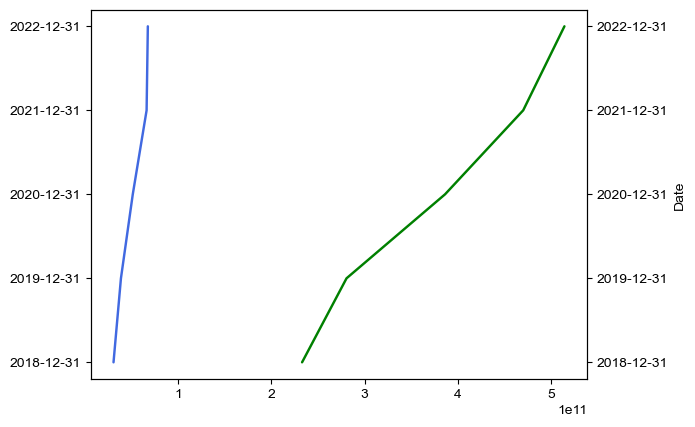

In [8]:
df = df_income_statement.sort_index(ascending = False)
df[['date', 'grossProfit', 'revenue']].head()

fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.style.use('seaborn')
plt.xlabel('Gross Profit and Revenue')
plt.ylabel('Date')
ax.plot(df['grossProfit'], df['date'], color = "royalblue")
ax2.plot(df['revenue'], df['date'], color = 'g')


plt.show()


In [9]:
#Net Profit Margin - This is the Ultimate analysis item -  can a business earn a profit when all deductions are considered
def format_float(npm):
    return f'{npm:,.2f}'
npm = df_income_statement[['netIncome', 'revenue']].applymap(format_float)
print(npm)
net_profit_margin = df_income_statement['netIncome'][0] / df_income_statement['revenue'][0]

print(f'Net Profit Margin {net_profit_margin:.2f}')
if net_profit_margin > 0.10:
    print('Current net profit margin indicates a healthy financial performance')
elif net_profit_margin < 0.10:
    print('raises concerns about profitability from your revenue streams')

           netIncome             revenue
0  -2,722,000,000.00  513,983,000,000.00
1  33,364,000,000.00  469,822,000,000.00
2  21,331,000,000.00  386,064,000,000.00
3  11,588,000,000.00  280,522,000,000.00
4  10,073,000,000.00  232,887,000,000.00
Net Profit Margin -0.01
raises concerns about profitability from your revenue streams


In [10]:
#Interest Coverage Ratio
def format_float(icr):
    return f'{icr:,.2f}'
icr = df_income_statement[['operatingIncome', 'interestExpense']].applymap(format_float)
print(icr)

int_coverage_ratio = df_income_statement['operatingIncome'][0] / df_income_statement['interestExpense'][0]
print(f'Interest Coverage ratio: {int_coverage_ratio:.2f}')

     operatingIncome   interestExpense
0  12,248,000,000.00  2,367,000,000.00
1  24,879,000,000.00  1,809,000,000.00
2  22,899,000,000.00  1,647,000,000.00
3  14,541,000,000.00  1,600,000,000.00
4  12,421,000,000.00  1,417,000,000.00
Interest Coverage ratio: 5.17


# Operating Margin
It reveals the amount that a business has earned before financing other costs are considered.

In [11]:
def format_float(om):
    return f'{om:,.2f}'
om = df_income_statement[["operatingIncome", 'revenue']].applymap(format_float)
print(om)

operating_margin = df_income_statement['operatingIncome'][0] / df_income_statement['revenue'][0]

print(f'Operating Margin: {operating_margin:.2f}')
if operating_margin > 0.10:
    print(f'With an Operating Margin of {operating_margin:.2f}, {ticker} demonstrates efficient cost management in generating profits from operations.')
else:
    print('The Operating Margin is below 10%, indicating a challenging profitability situation at the operational level.')

     operatingIncome             revenue
0  12,248,000,000.00  513,983,000,000.00
1  24,879,000,000.00  469,822,000,000.00
2  22,899,000,000.00  386,064,000,000.00
3  14,541,000,000.00  280,522,000,000.00
4  12,421,000,000.00  232,887,000,000.00
Operating Margin: 0.02
The Operating Margin is below 10%, indicating a challenging profitability situation at the operational level.
